<a href="https://colab.research.google.com/github/shanzabakhtds/OASIS-INFOBYTE/blob/main/Email_Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement:**

The SMS Spam Collection dataset encompasses 5,574 EMAIL messages labeled as ham (legitimate) or spam. This project seeks to utilize machine learning techniques to build a predictive model capable of accurately classifying SMS messages. The dataset, collected from various sources, provides an opportunity to explore natural language processing and machine learning algorithms for effective spam detection.

# ***Libraries***

In [1]:
# for reshaping arrays and working with numerical data
import numpy as np

#used for working with datasets, offering functions for data analysis, cleaning, exploration, and manipulation
import pandas as pd

#used for pie charts for visualizing results
from matplotlib import pyplot as plt
import seaborn as sns

# **Loading Dataset**

In [6]:

# Specify the encoding parameter when reading the CSV file
df = pd.read_csv('/content/spam.csv', encoding='latin-1')



# **Exploring The DataSet**

In [7]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# **Dropping the non-relevant unnamed columns**

In [14]:
#Let's drop the non-relevant unnamed columns
df=df.drop(['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'],axis=1)

# Renaming v1 & v2 as Category & Text
df=df.rename(columns={"v1":"Category","v2":"Text"})

#Sample post modifications
df.head()

,Category,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df.info()  #allows us to learn the shape of object types of our data.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Text      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [16]:
df.tail()

,Category,Text
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


# **Checking the dimension of the dataset**

In [17]:
print("Dimensions of the dataset in (rows, columns): ", df.shape)

Dimensions of the dataset in (rows, columns):  (5572, 2)


There are 5572 rows and 2 columns in the dataset

# **Checking The Coloumn Names in our Dataset**

In [18]:
print("\n Columns Names are : ")
print("  ")
df.columns


 Columns Names are : 
  


Index(['Category', 'Text'], dtype='object')

# **Check the number of values in each column**

In [19]:
df.nunique()

Category       2
Text        5169
dtype: int64

# **Checking Null values**

In [21]:
df.isnull().sum()*100/df.shape[0]

Category    0.0
Text        0.0
dtype: float64

# **Checking The Distribution Of The Ham & Spam**


 Label distribution (%):  ham     86.6
spam    13.4
Name: Category, dtype: float64


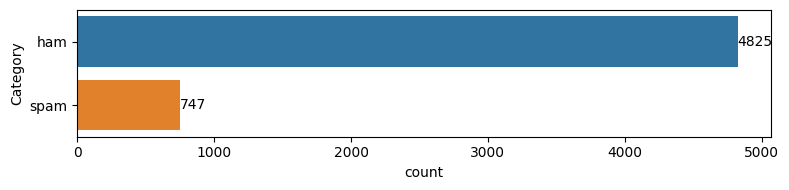

In [26]:
print('\n Label distribution (%): ', round(df.Category.value_counts(normalize=True),3)*100)
plt.figure(figsize=(8,2))
ax=sns.countplot(data=df, y='Category')
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()

# **Descriptive Statistics**

In [20]:
statistics = df.describe().transpose()
print("\n Descriptive Statistics:")
print(" ")
print(statistics)


 Descriptive Statistics:
 
         count unique                     top  freq
Category  5572      2                     ham  4825
Text      5572   5169  Sorry, I'll call later    30


# **Creating a Column To Check Of Each Text & Plot a Histogram To Check The Distirbution**


In [37]:
import plotly.express as px

# Assuming you've already read the CSV file and created the 'Length' column

# Distribution of the data
fig = px.histogram(df, x='Length', marginal='rug',
                   title='Histogram of Text Length',
                   color_discrete_sequence=['orange'])
fig.update_layout(
    xaxis_title='Length',
    yaxis_title='Frequency',
    showlegend=True
)

# Display the figure
fig.show()


# **Checking The Distribution Against Categories**


In [34]:
import plotly.express as px

fig = px.histogram(df, x='Length', color='Category', marginal='rug',
                   title='\t Histogram of Text Length by Category',
                   color_discrete_map={'ham': 'brown', 'spam': 'orange'})
fig.update_layout(
    xaxis_title='Length',
    yaxis_title='Frequency',
    showlegend=True)

fig.show()


Converting Categorical Variable to Numberical

In [38]:
#Let's Label the data as 0 & 1 i.e. Spam as 1 & Ham as 0
df.loc[:,'Category']=df.Category.map({'ham':0, 'spam':1})
df['Category'] = df['Category'].astype(int)
df.head()

<ipython-input-38-f839162f5a24>:2: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



,Category,Text,Length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


# **Bag of Words:**

"Bag of Words" (BoW) is a common technique used in natural language processing and text analysis. It is a way of representing text data as numerical feature vectors. The basic idea behind BoW is to create a "bag" that contains all unique words in a document (or a collection of documents) and then represent each document by counting the occurrences of these words. The order and structure of the words are ignored, and only their frequencies matter.

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

count = CountVectorizer()
text = count.fit_transform(df['Text'])
#Train & test split
x_train, x_test, y_train, y_test = train_test_split(text, df['Category'], test_size=0.30, random_state=100)
text

<5572x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 73916 stored elements in Compressed Sparse Row format>

# **Dimentions of The Train & Test Dataset**

In [44]:
 print('X-Train :', x_train.shape)
 print("\n")
print(' X-Test :',x_test.shape)
 print("\n")

display('  Y-Train :',y_train.shape)
 print("\n")

display('\n X-Test :',y_test.shape)

X-Train : (3900, 8672)


 X-Test : (1672, 8672)




'  Y-Train :'

(3900,)

'\n X-Test :'

(1672,)

# **Training the ML models**



# **Neural Network**



In [46]:
%%time
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

mlp_classifier_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)
mlp_classifier_model.fit(x_train, y_train)

prediction = mlp_classifier_model.predict(x_test)



CPU times: user 13.6 s, sys: 16.6 s, total: 30.2 s
Wall time: 17.2 s


In [47]:
# Calculate and print classification metrics
print ("MLP Classifier")
print("Accuracy score: {:.2f}".format(accuracy_score(y_test, prediction)))
print("Precision score: {:.2f}".format(precision_score(y_test, prediction)))
print("Recall score: {:.2f}".format(recall_score(y_test, prediction)))
print("F1 score: {:.2f}".format(f1_score(y_test, prediction)))



MLP Classifier
Accuracy score: 0.98
Precision score: 0.97
Recall score: 0.90
F1 score: 0.94


# **Accuracy of Neural Network = 98%**
# **Precision of Neural Network = 97%**

The values you provided are metrics used to evaluate the performance of a classification model. Here's a brief explanation of each metric:

1. **Accuracy:**
   - Accuracy is a measure of the overall correctness of the model. It is calculated as the ratio of correctly predicted instances to the total instances. In your case, an accuracy score of 0.98 means that the model correctly predicted the class of 98% of the instances in the test set.

2. **Precision:**
   - Precision is the ratio of correctly predicted positive observations to the total predicted positives. In other words, it measures how many of the instances predicted as positive are actually positive. A precision score of 0.97 indicates that 97% of the instances predicted as positive by the model are true positives.

3. **Recall (Sensitivity or True Positive Rate):**
   - Recall is the ratio of correctly predicted positive observations to all the actual positives. It measures the ability of the model to capture all the positive instances. A recall score of 0.90 means that the model correctly identified 90% of the actual positive instances.

4. **F1 Score:**
   - The F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall. A higher F1 score indicates a better balance between precision and recall. In your case, an F1 score of 0.94 suggests a good balance between precision and recall.

In summary, these metrics give us an overall picture of how well our model is performing. High values for accuracy, precision, recall, and F1 score generally indicate **good model performance,** but it's essential to consider the specific characteristics of our problem and the trade-offs between precision and recall based on our application's requirements.

# **Multinomial Naive Bayes**

In [48]:
%%time
# Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB

multinomial_nb_model = MultinomialNB()
multinomial_nb_model.fit(x_train, y_train)  # Train the model

prediction = multinomial_nb_model.predict(x_test)

print("Multinomial NB")
print("Accuracy score: {}". format(accuracy_score(y_test, prediction)) )
print("Precision score: {}". format(precision_score(y_test, prediction)) )
print("Recall score: {}". format(recall_score(y_test, prediction)))
print("F1 score: {}". format(f1_score(y_test, prediction)))

Multinomial NB
Accuracy score: 0.9814593301435407
Precision score: 0.9174311926605505
Recall score: 0.9389671361502347
F1 score: 0.9280742459396751
CPU times: user 25.2 ms, sys: 0 ns, total: 25.2 ms
Wall time: 34.2 ms


# **Multinomial NB**

> Accuracy score: 98%

> Precision score:91%






# **Bernoulli Naive Bayes**

In [49]:
%%time
# Bernoulli Naive Bayes model
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

bernoulli_nb_model = BernoulliNB()
bernoulli_nb_model.fit(x_train, y_train)

prediction = bernoulli_nb_model.predict(x_test)

#Evaluation
print("Bernoulli NB")
print("Accuracy score: {}". format(accuracy_score(y_test, prediction)) )
print("Precision score: {}". format(precision_score(y_test, prediction)) )
print("Recall score: {}". format(recall_score(y_test, prediction)))
print("F1 score: {}". format(f1_score(y_test, prediction)))

Bernoulli NB
Accuracy score: 0.9838516746411483
Precision score: 1.0
Recall score: 0.8732394366197183
F1 score: 0.9323308270676691
CPU times: user 26.9 ms, sys: 188 µs, total: 27.1 ms
Wall time: 27.6 ms


# **Bernoulli NB**

> Accuracy score: 98%

> Precision score:1.0


The precision score of 1.0 means that the model achieved **perfect** **precision**, indicating that every instance predicted as positive was indeed positive.

# **Confusion Matrix**

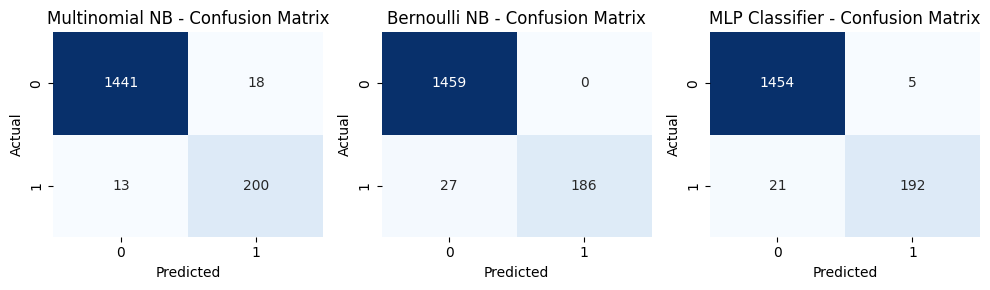

In [50]:
#Confusion Matrix Subplot for 3 Models
from sklearn.metrics import confusion_matrix
models = [("Multinomial NB", multinomial_nb_model), ("Bernoulli NB", bernoulli_nb_model),("MLP Classifier", mlp_classifier_model) ]

fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for i, (model_name, model) in enumerate(models):
    prediction = model.predict(x_test)
    cm = confusion_matrix(y_test, prediction)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[i])
    axes[i].set_title(f"{model_name} - Confusion Matrix")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")
plt.tight_layout()
plt.show()

#**Metric Comparison Heatmap**

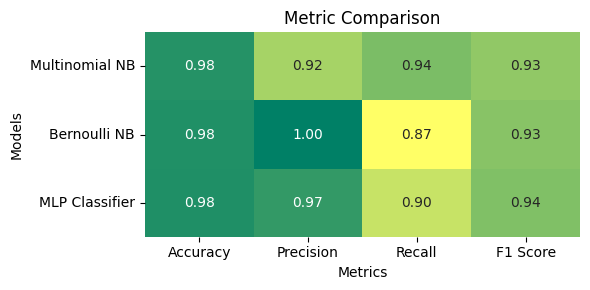

In [51]:
#Metric Comparison Heatmap
metric_data = []
for model_name, model in models:
    prediction = model.predict(x_test)
    accuracy = accuracy_score(y_test, prediction)
    precision = precision_score(y_test, prediction)
    recall = recall_score(y_test, prediction)
    f1 = f1_score(y_test, prediction)
    metric_data.append([accuracy, precision, recall, f1])
metric_labels = ["Accuracy", "Precision", "Recall", "F1 Score"]
#heatmap for metric comparison
plt.figure(figsize=(6, 3))
sns.heatmap(metric_data, annot=True, fmt=".2f", cbar=False, cmap="summer_r", xticklabels=metric_labels, yticklabels=[model_name for model_name, _ in models])
plt.title("Metric Comparison")
plt.yticks(rotation=0)
plt.xlabel("Metrics")
plt.ylabel("Models")
plt.tight_layout()
plt.show()
